In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import random
#import time
import sqlite3

### Loading data:

In [2]:
con = sqlite3.connect('Estate_data.sqlite') # We must choose the name for our DB !

In [3]:
cursor = con.cursor()
# Getting all tables from sqlite_master
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
cursor.execute(sql_query)
sqlite_tables = cursor.fetchall()
sqlite_tables = [*map(lambda table: table[0] ,sqlite_tables)]
sqlite_tables

['OFFERS_TABLE', 'DESCRIPTION_TABLE']

In [4]:
df = pd.read_sql('SELECT * FROM DESCRIPTION_TABLE', con = con)

In [5]:
df_offers = pd.read_sql('SELECT * FROM OFFERS_TABLE', con = con)
#file_name="Prague_apartments_sale_2023-01-14.gzip"
#df_parquet=pd.read_parquet(file_name)
#df_parquet=df_parquet.drop_duplicates()
#df_parquet

In [6]:
# Closing the connection
con.close()

#### Data types

In [7]:
df.dtypes

hash_id                          object
description                      object
discounted                       object
price_original                   object
id_order                         object
date_update                      object
building_type                    object
building_condition               object
building_location                object
area_net                         object
area_floor                       object
price_total                      object
price_note                       object
transport                        object
area_build_up                    object
date_moving_in                   object
date_building_approval           object
equipped                         object
electricity                      object
traffic_communication            object
barrier_free                     object
id                               object
energy_efficient_rating          object
lift                             object
building_floor_type              object


In [8]:
# Columns which have spaces between numbers
columns_to_transform = ["price_total", "price_sqm"]
for col in columns_to_transform:
    # 1.
    df[col].replace(np.nan, "None", inplace=True)
    # 2.
    df[col] = df[col].apply(lambda x: x.replace("\xa0", ""))
    # 3.
    df[col].replace("None", np.nan, inplace=True)

In [9]:
# Convert to correct data types   - ? use Int64 (capitalized) instead of float64 for integers columns to keep np.NaN ?
settings = {"hash_id": np.int64,
            "area_net" : np.float64,
            "area_floor" : np.float64,
            "price_total" : np.float64,
            "area_build_up" : np.float64,
            "area_garden" : np.float64,
            "price_sqm" : np.float64,
            "area_landplot" : np.float64,
            #"building_floor" : np.float64,  may contain letters
            "ceiling_height" : np.float64      
}

df = df.astype(settings)

In [12]:
#df["price_sqm"].isnull().sum()
#df["price_total"].isnull().sum()

In [13]:
df.dtypes

hash_id                            int64
description                       object
discounted                        object
price_original                    object
id_order                          object
date_update                       object
building_type                     object
building_condition                object
building_location                 object
area_net                         float64
area_floor                       float64
price_total                      float64
price_note                        object
transport                         object
area_build_up                    float64
date_moving_in                    object
date_building_approval            object
equipped                          object
electricity                       object
traffic_communication             object
barrier_free                      object
id                                object
energy_efficient_rating           object
lift                              object
building_floor_t

#### Joining

In [14]:
df = df.merge(df_offers, on = "hash_id", how = "inner")

In [15]:
del df_offers

In [16]:
df.columns

Index(['hash_id', 'description', 'discounted', 'price_original', 'id_order',
       'date_update', 'building_type', 'building_condition',
       'building_location', 'area_net', 'area_floor', 'price_total',
       'price_note', 'transport', 'area_build_up', 'date_moving_in',
       'date_building_approval', 'equipped', 'electricity',
       'traffic_communication', 'barrier_free', 'id',
       'energy_efficient_rating', 'lift', 'building_floor_type',
       'building_floor', 'water', 'gas', 'waste', 'heating',
       'telecommunication', 'date_year_reconstruction',
       'energy_efficient_rating_card', 'availability', 'date_offer_start',
       'energy_efficient_rating_index', 'date_tour', 'date_tour_to',
       'area_garden', 'ceiling_height', 'parking', 'price_sqm', 'office_count',
       'garage', 'place_count', 'basin', 'area_landplot', 'share_size',
       'auction_initial_price', 'expert_opinion_official', 'auction_min_bid',
       'auction_principal', 'auction_type', 'auction_p

#### Price column?

In [17]:
df.columns[df.columns.str.contains("price")]

Index(['price_original', 'price_total', 'price_note', 'price_sqm',
       'auction_initial_price', 'price', 'price_czk', 'price_czk_unit',
       'price_czk_name'],
      dtype='object')

In [18]:
df[df.columns[df.columns.str.contains("price")]]   # price_total column is correct in my opinion!

,price_original,price_total,price_note,price_sqm,auction_initial_price,price,price_czk,price_czk_unit,price_czk_name
0,None,25000000.0,AKCE - SLEVA 4 500 000 Kč do konce ledna,9641.0,None,16282000,16282000,,Celková cena
1,None,6500000.0,"včetně DPH, včetně poplatků, včetně provize, v...",6002.0,None,3587000,3587000,,Celková cena
2,None,7900000.0,SKVĚLÁ CENA - AKCE DO KONCE ÚNORA,7783.0,None,6071000,6071000,,Celková cena
3,None,8600000.0,"LEDNOVÁ AKCE - 400 000,- SLEVA",10983.0,None,4967000,4967000,,Celková cena
4,None,15500000.0,15500000,13248.0,None,8555000,8555000,,Celková cena
...,...,...,...,...,...,...,...,...,...
335,None,4648600.0,None,1258.0,None,2565000,2565000,,Celková cena
336,None,NaN,None,NaN,None,0,0,,Celková cena
337,None,4800000.0,Investice. Cena včetně právního a finančního s...,795.0,None,2649000,2649000,,Celková cena
338,None,NaN,None,NaN,None,0,0,,Celková cena


In [19]:
# Drop columns, we do not care about !!!
columns_to_drop = ['discounted',
                   'price_original', 
                   'id_order', 
                   'date_building_approval', 
                   'id', 
                   'date_year_reconstruction', 
                   'date_offer_start',
                   'date_tour',
                   'date_tour_to',
                   'office_count',
                   'place_count',
                   'share_size',
                   'auction_initial_price',
                   'expert_opinion_official',
                   'auction_min_bid',
                   'auction_principal',
                   'auction_type',
                   'auction_place',
                   'auction_date',
                   'auction_decree',
                   'expert_opinion'
                   ]

df.drop(columns_to_drop, axis=1, inplace= True)

### Processing:

In [20]:
columns_w_mult_values = ["transport", "electricity", "telecommunication"]

def transformer(value):
    if value != None:
        return value.split("  ")

for column in columns_w_mult_values:
        df[column] = df[column].apply(lambda row: transformer(row))

In [21]:
df[columns_w_mult_values]

,transport,electricity,telecommunication
0,"[Vlak, Dálnice, Silnice, MHD, Autobus]","[230V, 400V]","[Internet, Kabelové rozvody]"
1,"[Silnice, MHD]",[230V],None
2,"[Vlak, Silnice, MHD, Autobus]",[230V],"[Telefon, Internet, Kabelové rozvody]"
3,"[Vlak, Silnice, MHD, Autobus]",[230V],"[Telefon, Internet, Kabelové rozvody]"
4,None,None,None
...,...,...,...
335,None,None,None
336,"[Dálnice, MHD]",None,None
337,None,None,None
338,[MHD],None,None


In [22]:
possible_values = {"transport" : ["Vlak", "Dálnice", "Silnice", "MHD", "Autobus"],
                   "electricity" : ["230V", "400V", "120V"],
                   "telecommunication" : ["Internet", "Telefon", "Kabelové rozvody", "Satelit", "Kabelová televize"] # "Ostatní"
                    }

def transformer(value):
    if value != None:
        if y in value:
            return True
        else:
            return False

for i in possible_values:
    for y in possible_values[i]:
        df[y] = df[i].apply(lambda row: transformer(row))

In [23]:
columns = ["lift", "equipped", "barrier_free"] # 'basin', "garage", "parking" | ("transport", "electricity", "telecommunication")
for col in columns:
    df[col].replace(np.nan, "false", inplace = True)

### TODO: Missing values, outliers, EDA

In [ ]:
#df = df.drop_duplicates(subset=df.columns)

Missing values:

building_type : 340
building_condition : 340
building_location : 174
area_net : 340
area_floor : 340
price_total : 82
price_note : 165
transport : 184
area_build_up : 340
date_moving_in : 278
electricity : 198
traffic_communication : 225
energy_efficient_rating : 340
building_floor_type : 340
building_floor : 340
water : 202
gas : 246
waste : 205
heating : 307
telecommunication : 308
energy_efficient_rating_card : 340
availability : 339
energy_efficient_rating_index : 340
area_garden : 340
ceiling_height : 340
parking : 340
price_sqm : 73
garage : 340
basin : 340
company_id : 201
company_name : 201
Vlak : 184
Dálnice : 184
Silnice : 184
MHD : 184
Autobus : 184
230V : 198
400V : 198
120V : 198
Internet : 308
Telefon : 308
Kabelové rozvody : 308
Satelit : 308
Kabelová televize : 308


<AxesSubplot:>

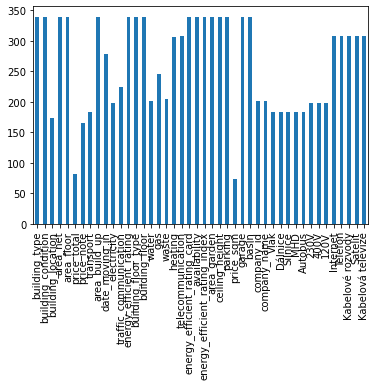

In [24]:
columns_na = [col for col in df.columns if df[col].isna().sum() != 0]
columns_na
for col in columns_na:
    print(col,":",df[col].isna().sum())
df[columns_na].isna().sum().plot(kind="bar")

In [25]:
df.locality.value_counts()#.plot(kind="bar")

Praha                               29
Praha 6 - Dejvice                   13
Praha 9 - Horní Počernice           11
Praha 8 - Bohnice                   10
Praha 5 - Stodůlky                   8
                                    ..
Praha 10 - Strašnice                 1
Praha 9 - Malešice                   1
Praha 5 - Praha 16                   1
Praha 7 - Troja                      1
Praha 10 - Praha-Dolní Měcholupy     1
Name: locality, Length: 102, dtype: int64

# Price:

In [103]:
#df.dropna(subset=["price_total"], axis=0, inplace = True) | Fill NaN - medium price in different Regions?

In [26]:
df["price_total"]

0      25000000.0
1       6500000.0
2       7900000.0
3       8600000.0
4      15500000.0
          ...    
335     4648600.0
336           NaN
337     4800000.0
338           NaN
339    28495000.0
Name: price_total, Length: 340, dtype: float64

In [27]:
df["price_total"].describe()

count    2.580000e+02
mean     1.771041e+07
std      3.243626e+07
min      4.900000e+04
25%      4.864222e+06
50%      1.099250e+07
75%      1.897500e+07
max      3.565175e+08
Name: price_total, dtype: float64

### Area

In [29]:
df["area"]  # Wrong values ?

0      2593
1      1083
2      1015
3       783
4      1170
       ... 
335    3695
336    1074
337    6036
338    3388
339    2050
Name: area, Length: 340, dtype: int64

In [30]:
df["area"].describe()

count    3.400000e+02
mean     4.036078e+08
std      7.441749e+09
min      1.000000e+00
25%      7.022500e+02
50%      1.322500e+03
75%      4.241250e+03
max      1.372191e+11
Name: area, dtype: float64